In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.api import VAR
from statsmodels.tsa.stattools import adfuller
from statsmodels.tools.eval_measures import rmse, aic
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.graphics.tsaplots import plot_acf

In [2]:
# new cases
# update from 06/29
Index=pd.date_range("2020-6-29","2020-")
Updated_US=[]
Updated_Europe=[]
June_1D=pd.DataFrame({'Date':Index,'United States':Updated_US,'Europe':Updated_Europe}).set_index('Date')

In [3]:
df=pd.read_csv('daily_cases.csv',parse_dates=['Date'])
df.head()

,Entity,Code,Date,Daily confirmed cases (cases)
0,Afghanistan,AFG,2019-12-31,0
1,Afghanistan,AFG,2020-01-01,0
2,Afghanistan,AFG,2020-01-02,0
3,Afghanistan,AFG,2020-01-03,0
4,Afghanistan,AFG,2020-01-04,0


In [4]:
df.columns=['Country','Code','Date','Cases']

In [5]:
df=df.drop('Code',axis=1)

In [6]:
df=df.sort_values('Date')
df.tail()

,Country,Date,Cases
22060,Pakistan,2020-07-09,3359
16028,Laos,2020-07-09,0
3745,Bermuda,2020-07-09,1
22183,Palestine,2020-07-09,475
31739,Zimbabwe,2020-07-09,98


In [7]:
df_new=df.pivot(index='Date',columns='Country',values='Cases')
df_new.head()

Country,Afghanistan,Africa,Albania,Algeria,Andorra,Angola,Anguilla,Antigua and Barbuda,Argentina,Armenia,...,Venezuela,Vietnam,Western Sahara,World,World excl. China,World excl. China and South Korea,"World excl. China, South Korea, Japan and Singapore",Yemen,Zambia,Zimbabwe
Date,,,,,,,,,,,,,,,,,,,,,
2019-12-31,0.0,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0,...,NaN,0.0,NaN,27.0,0.0,0.0,0.0,NaN,NaN,NaN
2020-01-01,0.0,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0,...,NaN,0.0,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN
2020-01-02,0.0,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0,...,NaN,0.0,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN
2020-01-03,0.0,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0,...,NaN,0.0,NaN,17.0,0.0,0.0,0.0,NaN,NaN,NaN
2020-01-04,0.0,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0,...,NaN,0.0,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN


In [8]:
df_new=df_new.fillna(0)

In [9]:
df_new.drop(pd.to_datetime('2020-07-09'),inplace=True)

In [10]:
df_new.head()

Country,Afghanistan,Africa,Albania,Algeria,Andorra,Angola,Anguilla,Antigua and Barbuda,Argentina,Armenia,...,Venezuela,Vietnam,Western Sahara,World,World excl. China,World excl. China and South Korea,"World excl. China, South Korea, Japan and Singapore",Yemen,Zambia,Zimbabwe
Date,,,,,,,,,,,,,,,,,,,,,
2019-12-31,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,27.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-01-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-01-02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-01-03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,17.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-01-04,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


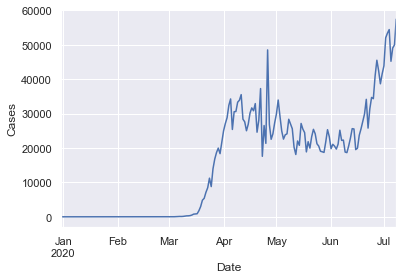

In [11]:
sns.set()
df_new['United States'].plot()
plt.ylabel('Cases')
plt.show()

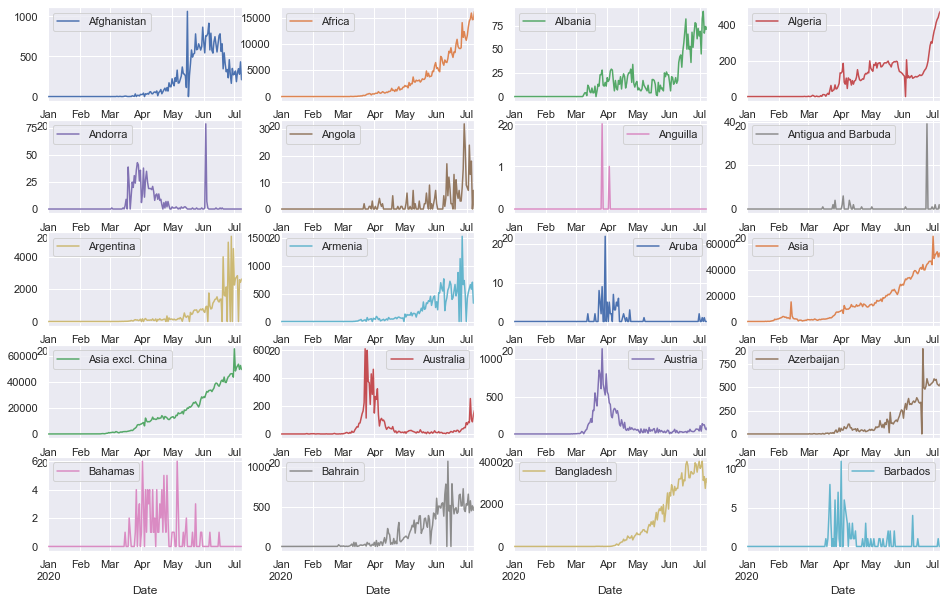

In [12]:
df_new.iloc[:,0:20].plot(subplots=True,sharex=False,sharey=False,figsize=(16,10),layout=(5,4))
plt.show()

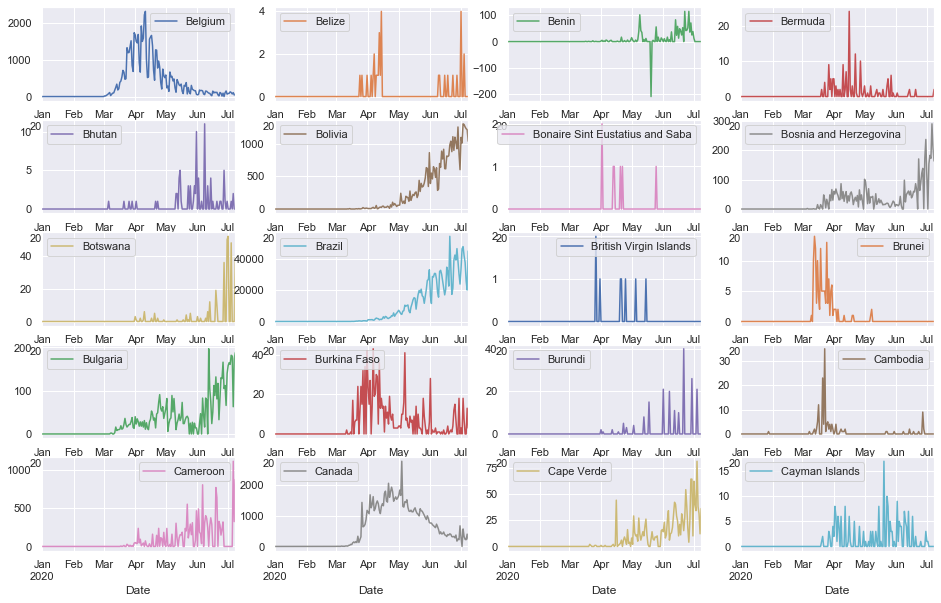

In [13]:
df_new.iloc[:,21:41].plot(subplots=True,sharex=False,sharey=False,figsize=(16,10),layout=(5,4))
plt.show()

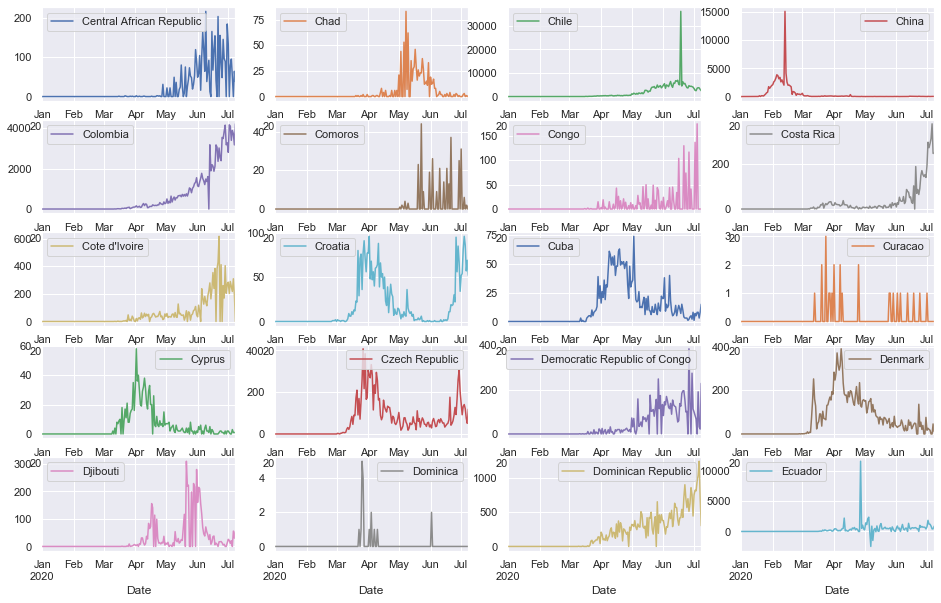

In [14]:
df_new.iloc[:,41:61].plot(subplots=True,sharex=False,sharey=False,figsize=(16,10),layout=(5,4))
plt.show()

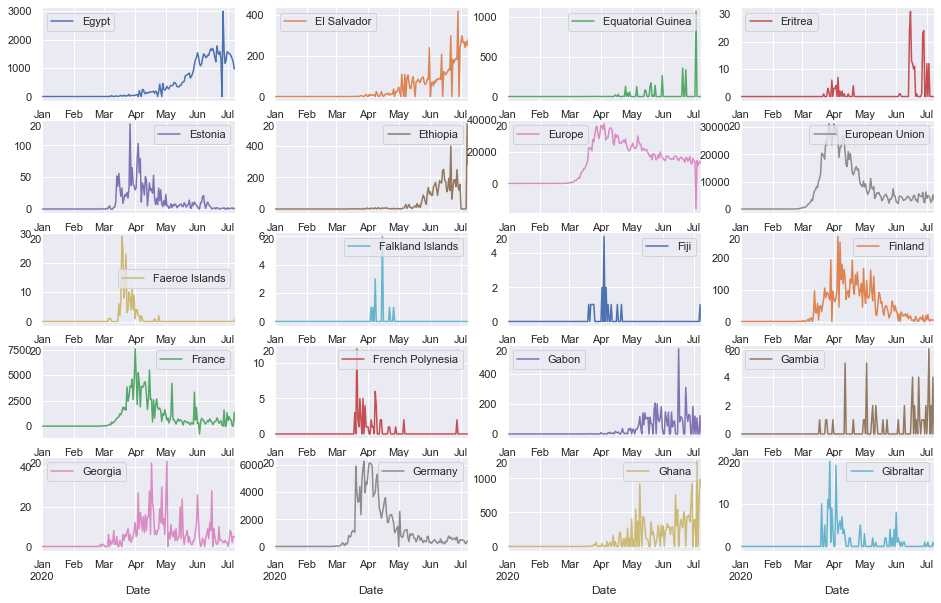

In [15]:
df_new.iloc[:,61:81].plot(subplots=True,sharex=False,sharey=False,figsize=(16,10),layout=(5,4))
plt.show()

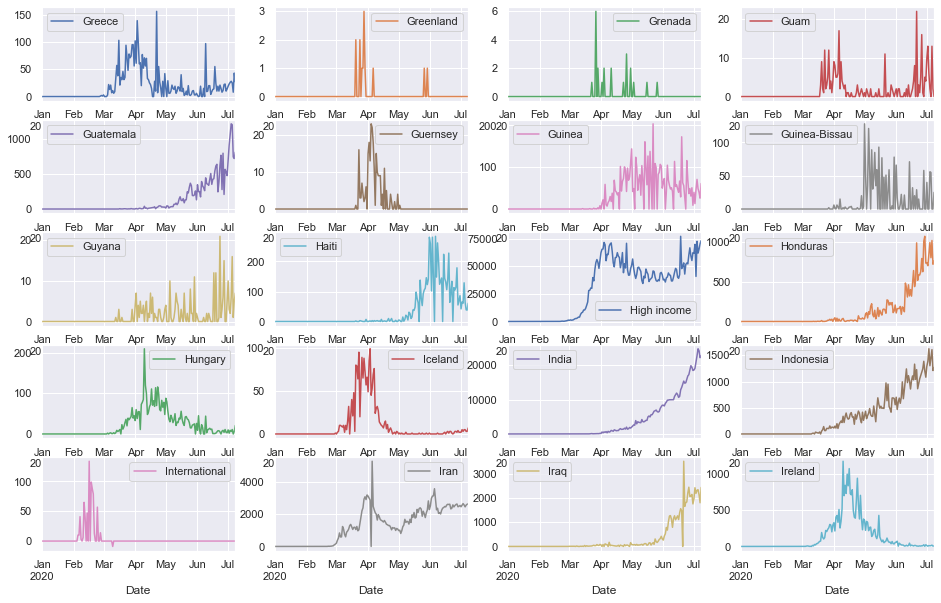

In [16]:
df_new.iloc[:,81:101].plot(subplots=True,sharex=False,sharey=False,figsize=(16,10),layout=(5,4))
plt.show()

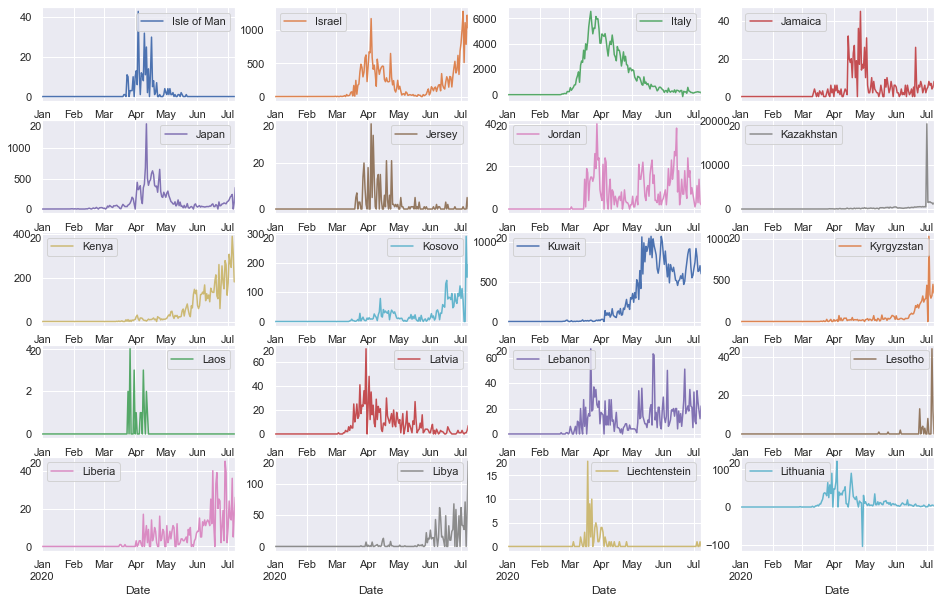

In [17]:
df_new.iloc[:,101:121].plot(subplots=True,sharex=False,sharey=False,figsize=(16,10),layout=(5,4))
plt.show()

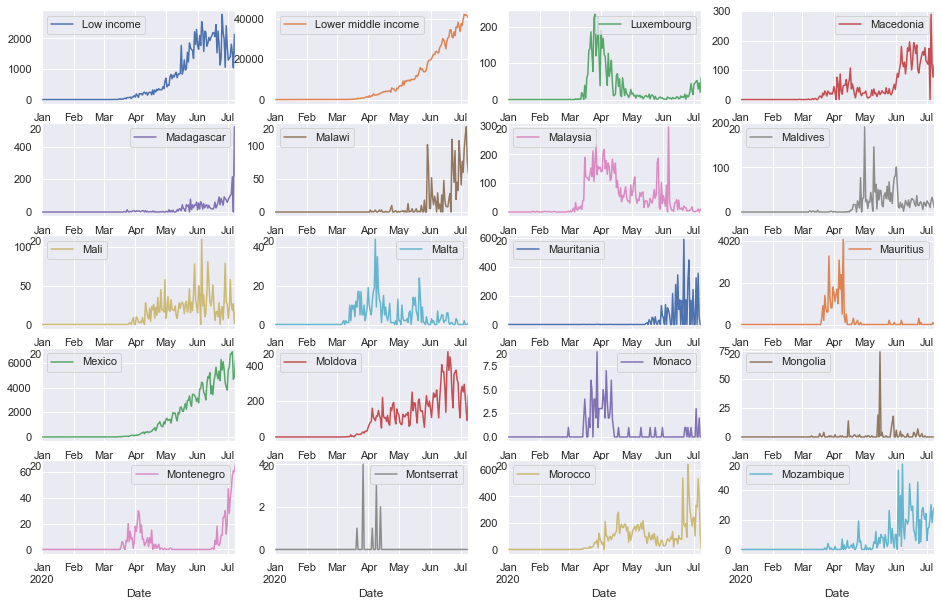

In [18]:
df_new.iloc[:,121:141].plot(subplots=True,sharex=False,sharey=False,figsize=(16,10),layout=(5,4))
plt.show()

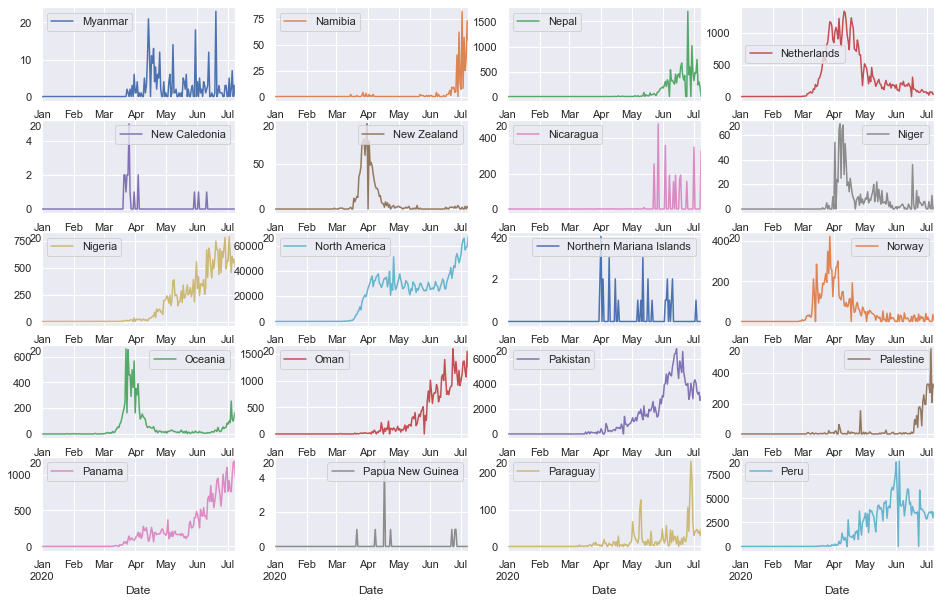

In [19]:
df_new.iloc[:,141:161].plot(subplots=True,sharex=False,sharey=False,figsize=(16,10),layout=(5,4))
plt.show()

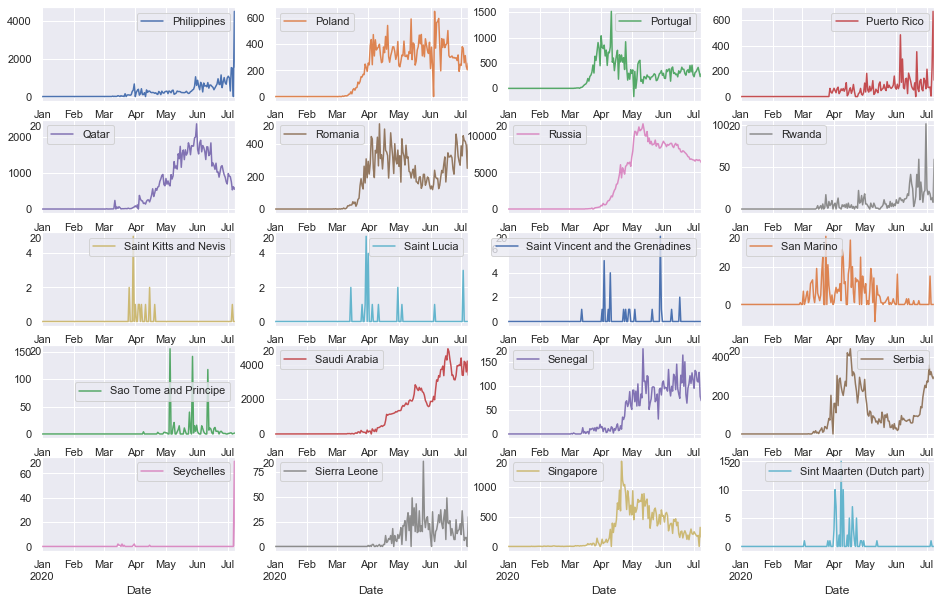

In [20]:
df_new.iloc[:,161:181].plot(subplots=True,sharex=False,sharey=False,figsize=(16,10),layout=(5,4))
plt.show()

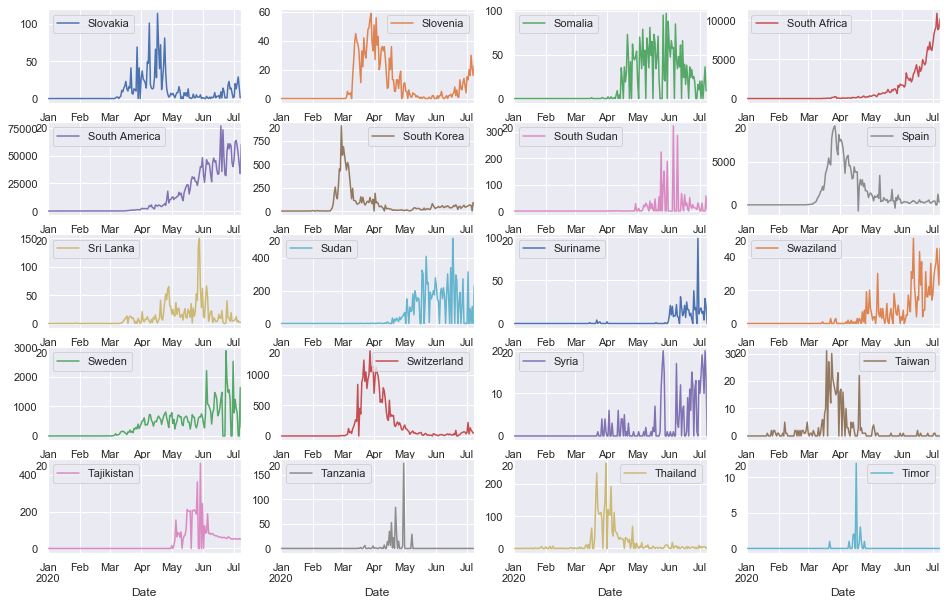

In [21]:
df_new.iloc[:,181:201].plot(subplots=True,sharex=False,sharey=False,figsize=(16,10),layout=(5,4))
plt.show()

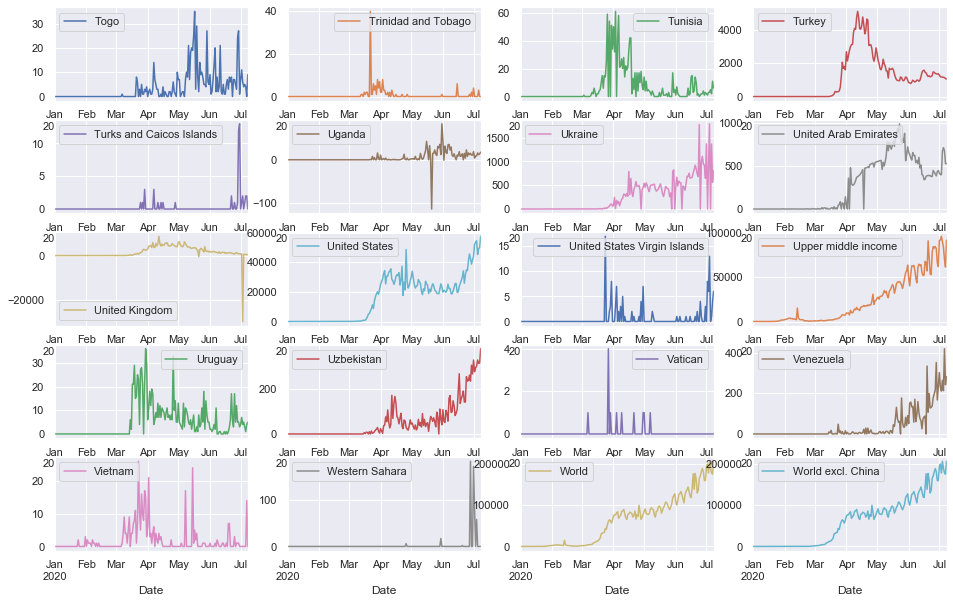

In [22]:
df_new.iloc[:,201:221].plot(subplots=True,sharex=False,sharey=False,figsize=(16,10),layout=(5,4))
plt.show()

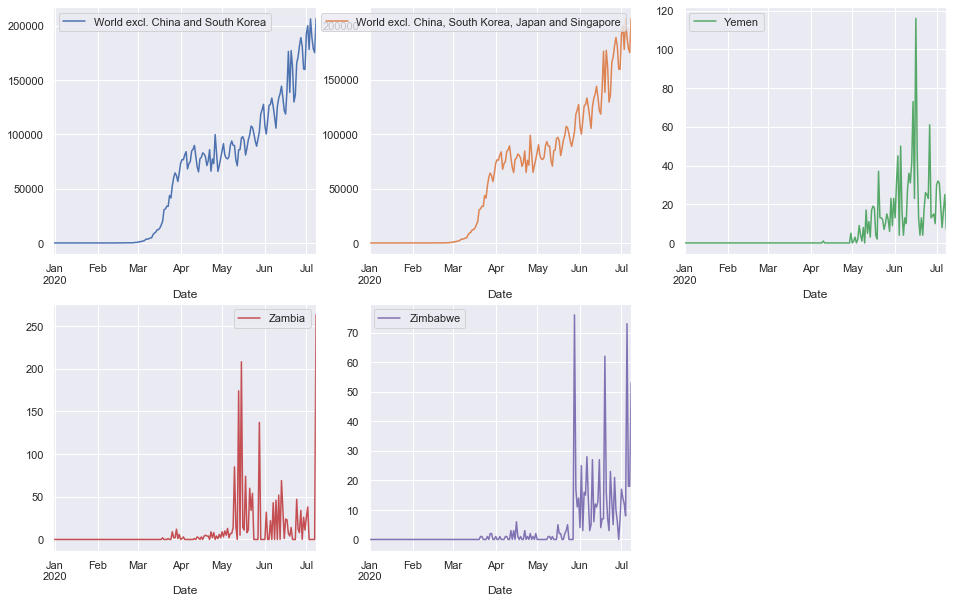

In [23]:
df_new.iloc[:,221:226].plot(subplots=True,sharex=False,sharey=False,figsize=(16,10),layout=(2,3))
plt.show()

# SARIMA

In [24]:
# Create US from 2020-03-22
US=df_new['United States'].loc['2020-03-22':]
US.tail()

Date
2020-07-04    54442.0
2020-07-05    45221.0
2020-07-06    49093.0
2020-07-07    49990.0
2020-07-08    57473.0
Name: United States, dtype: float64

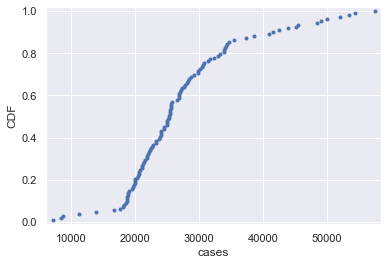

In [25]:
# cumulative probability distribution
def ecdf(data):
    n=len(data)
    x=np.sort(data)
    y=np.arange(1,len(data)+1)/n
    return x,y

x,y=ecdf(US)
plt.plot(x,y,marker='.',linestyle='none')
plt.margins(0.02)
plt.xlabel('cases')
plt.ylabel('CDF')
plt.show()

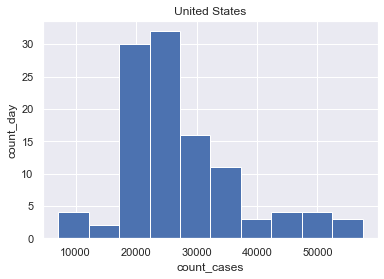

In [26]:
bins=int(round(np.sqrt(US.shape[0])))
US.hist(bins=bins)
plt.ylabel('count_day')
plt.xlabel('count_cases')
plt.title('United States')
plt.show()

In [27]:
#ADF test: since p_value>0.05
# So can not reject it is a Random walk
adfuller(US)[1]

0.8557948671221012

In [28]:
import statsmodels.api as sm 
from pylab import rcParams

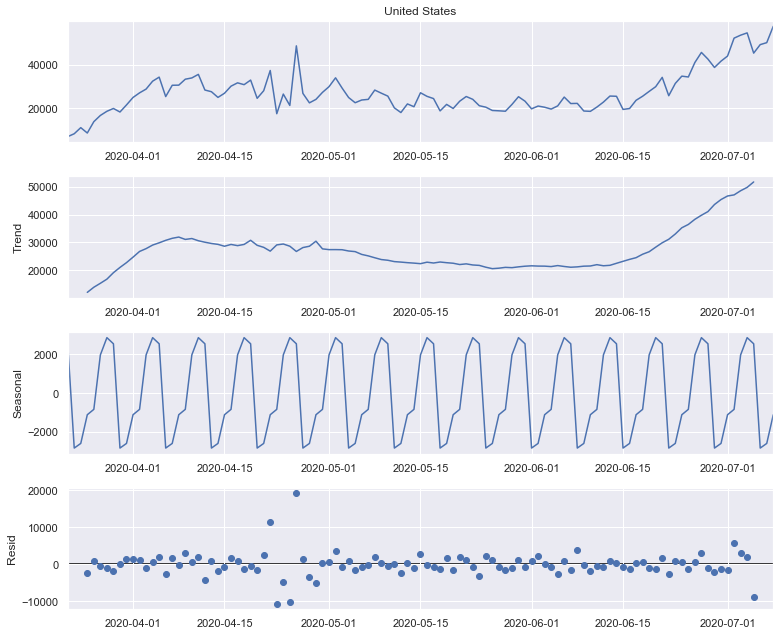

In [29]:
rcParams['figure.figsize']=11,9
decomposition=sm.tsa.seasonal_decompose(US)
fig=decomposition.plot()
plt.show()

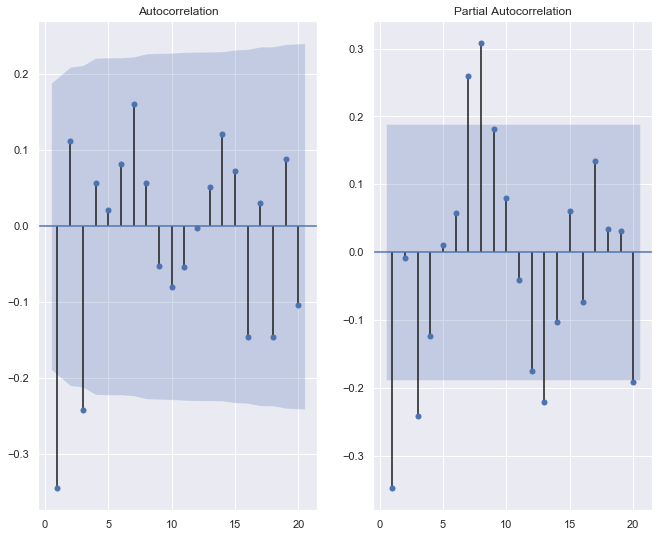

In [30]:
# Look at the autocorrelation
# q=1, d=1
fig, axes= plt.subplots(1,2)
plot_acf(np.log(US).diff().dropna(),lags=20,ax=axes[0],zero=False)
plot_pacf(np.log(US).diff().dropna(),lags=20,ax=axes[1],zero=False)
plt.show()

In [31]:
# check seasonality
for i in range(2,10):
    de_trend=np.log(US)-np.log(US).rolling(i).mean()
    print(de_trend.dropna().std())

0.09438203813217619
0.11982698591062178
0.14097429371208306
0.1529286479168163
0.1582192262841813
0.1599906203644872
0.16196201036279595
0.16780591474811574


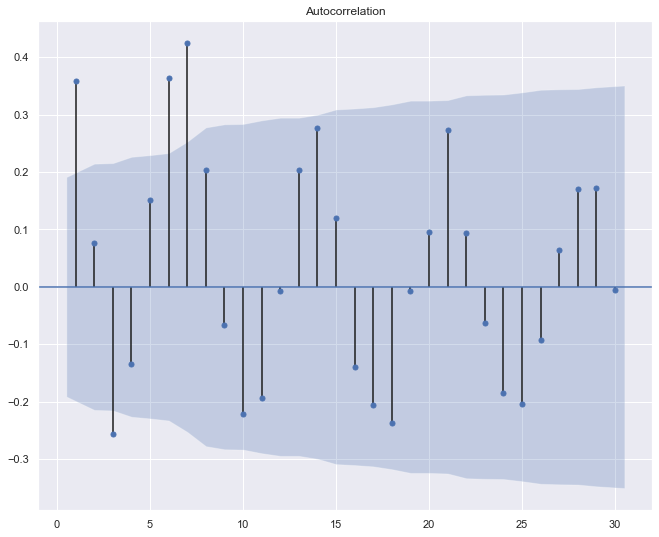

In [32]:
# significant seasonality Q=6,7
de_trend=np.log(US)-np.log(US).rolling(5).mean()
plot_acf(de_trend.dropna(),lags=30,zero=False,alpha=0.05)
plt.show()

In [33]:
import warnings
import itertools
import numpy as np
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
import pandas as pd
import statsmodels.api as sm
import matplotlib

In [34]:
p = d = q = range(0, 2)                #range
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 8) for x in list(itertools.product(p, d, q))]
print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

lowest_aic = None
lowest_parm = None
lowest_param_seasonal = None

for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(np.log(US),#y
                                            
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            
            results = mod.fit()

            current_aic = results.aic
            # Set baseline for aic
            if (lowest_aic == None):
                lowest_aic = results.aic
            # Compare results
            if (current_aic <= lowest_aic):
                lowest_aic = current_aic
                lowest_parm = param
                lowest_param_seasonal = param_seasonal
            print('SARIMA{}x{} - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue
            print('The best model is: SARIMA{}x{} - AIC:{}'.format(lowest_parm, lowest_param_seasonal, lowest_aic))


Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 8)
SARIMAX: (0, 0, 1) x (0, 1, 0, 8)
SARIMAX: (0, 1, 0) x (0, 1, 1, 8)
SARIMAX: (0, 1, 0) x (1, 0, 0, 8)
SARIMA(0, 0, 0)x(0, 0, 0, 8) - AIC:809.5101241410423
SARIMA(0, 0, 0)x(0, 0, 1, 8) - AIC:642.8558993378159
SARIMA(0, 0, 0)x(0, 1, 0, 8) - AIC:56.598203280647944
SARIMA(0, 0, 0)x(0, 1, 1, 8) - AIC:5.8924475833220935
SARIMA(0, 0, 0)x(1, 0, 0, 8) - AIC:55.67535512873406
SARIMA(0, 0, 0)x(1, 0, 1, 8) - AIC:48.80079694533596
SARIMA(0, 0, 0)x(1, 1, 0, 8) - AIC:7.275031649658256
SARIMA(0, 0, 0)x(1, 1, 1, 8) - AIC:7.98338635045831
SARIMA(0, 0, 1)x(0, 0, 0, 8) - AIC:662.2958031517499
SARIMA(0, 0, 1)x(0, 0, 1, 8) - AIC:507.6748509191565
SARIMA(0, 0, 1)x(0, 1, 0, 8) - AIC:21.621281716857517
SARIMA(0, 0, 1)x(0, 1, 1, 8) - AIC:-2.4099951891370193
SARIMA(0, 0, 1)x(1, 0, 0, 8) - AIC:29.802428124386076
SARIMA(0, 0, 1)x(1, 0, 1, 8) - AIC:20.68665446831729
SARIMA(0, 0, 1)x(1, 1, 0, 8) - AIC:0.0864590922708981
SARIMA

In [35]:
#parameter Tuning
import pmdarima as pm
results=pm.auto_arima(np.log(US),d=1,start_p=0,start_q=1,max_p=0,max_q=3,
                      seasonal=True,m=7,D=0,start_P=0,Start_Q=0,max_P=1,max_Q=1,
                     information_criterion='aic',trace=True,erro_action='ignore',stepwise=True)                    

Performing stepwise search to minimize aic
Fit ARIMA(0,1,1)x(0,0,1,7) [intercept=True]; AIC=-69.859, BIC=-59.131, Time=0.148 seconds
Fit ARIMA(0,1,0)x(0,0,0,7) [intercept=True]; AIC=-50.642, BIC=-45.277, Time=0.045 seconds
Fit ARIMA(0,1,0)x(1,0,0,7) [intercept=True]; AIC=-51.679, BIC=-43.633, Time=0.070 seconds
Fit ARIMA(0,1,0)x(0,0,0,7) [intercept=False]; AIC=-51.504, BIC=-48.822, Time=0.017 seconds
Fit ARIMA(0,1,1)x(0,0,0,7) [intercept=True]; AIC=-63.582, BIC=-55.536, Time=0.038 seconds
Fit ARIMA(0,1,1)x(1,0,1,7) [intercept=True]; AIC=-73.868, BIC=-60.457, Time=0.365 seconds
Fit ARIMA(0,1,1)x(1,0,0,7) [intercept=True]; AIC=-72.312, BIC=-61.583, Time=0.093 seconds
Fit ARIMA(0,1,0)x(1,0,1,7) [intercept=True]; AIC=-53.679, BIC=-42.951, Time=0.318 seconds
Near non-invertible roots for order (0, 1, 0)(1, 0, 1, 7); setting score to inf (at least one inverse root too close to the border of the unit circle: 0.994)
Fit ARIMA(0,1,2)x(1,0,1,7) [intercept=True]; AIC=-72.350, BIC=-56.257, Time=0.

In [36]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
mod = SARIMAX(endog=np.log(US),order=(0, 1, 1),seasonal_order=(1, 0, 1, 7))  #value
                                
results = mod.fit()

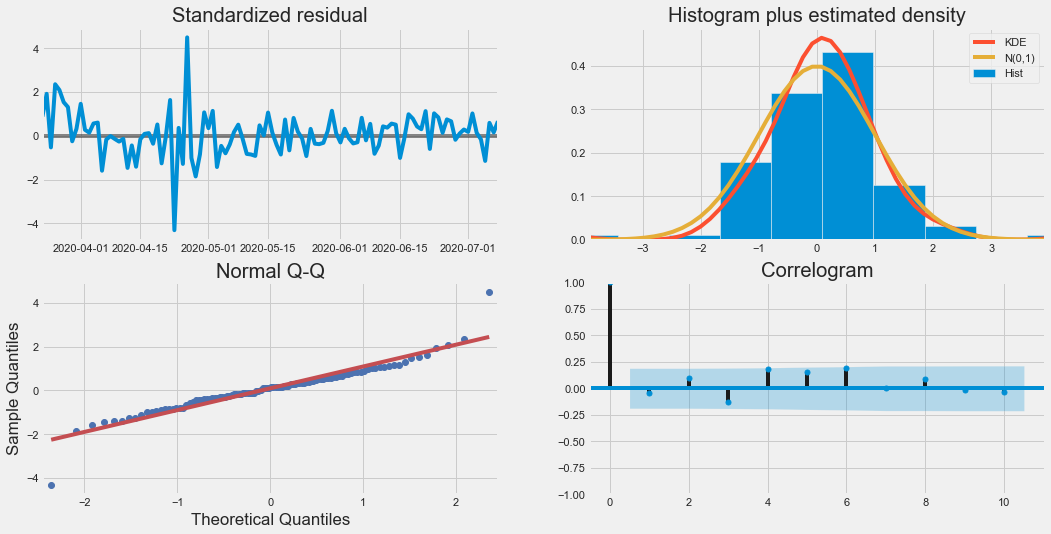

In [37]:
#plot diagnostics
results.plot_diagnostics(figsize=(16, 8))
plt.show()

In [38]:
# no autocorrelation between residuals 
# however, not normally distributed since there is voladility
# Still not bad
print(results.summary())

                                     SARIMAX Results                                     
Dep. Variable:                     United States   No. Observations:                  109
Model:             SARIMAX(0, 1, 1)x(1, 0, 1, 7)   Log Likelihood                  40.605
Date:                           Sun, 12 Jul 2020   AIC                            -73.211
Time:                                   22:45:58   BIC                            -62.482
Sample:                               03-22-2020   HQIC                           -68.861
                                    - 07-08-2020                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.4483      0.082     -5.486      0.000      -0.609      -0.288
ar.S.L7        0.8553      0.119      7.170

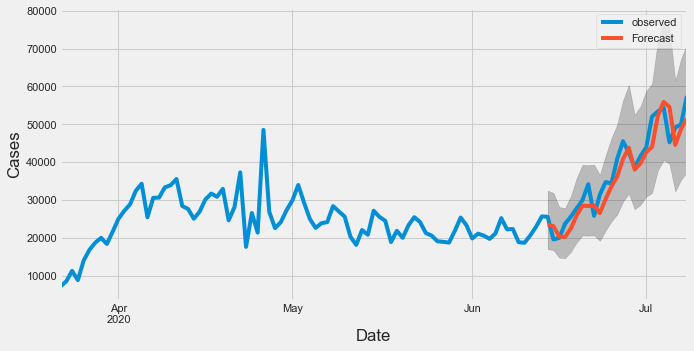

In [39]:
# visualize test
pred_uc = results.get_prediction(start=pd.to_datetime('2020-06-14'), dynamic=False) # steps
# exp
pred_ci = np.exp(pred_uc.conf_int())     #95% confidence interval
# exp
pred_mean=np.exp(pred_uc.predicted_mean) # predicted mean_value

ax = US.plot(label='observed', figsize=(10, 5)) #value
pred_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('Cases')
plt.legend()
plt.show()

In [40]:
# Evaluation
# Very good result
from statsmodels.tsa.stattools import acf
def forecast_accuracy(forecast, actual):
    mape = np.mean(np.abs(forecast - actual)/np.abs(actual))  # MAPE
    me = np.mean(forecast - actual)             # ME
    mae = np.mean(np.abs(forecast - actual))    # MAE
    mpe = np.mean((forecast - actual)/actual)   # MPE
    rmse = np.mean((forecast - actual)**2)**.5  # RMSE
    corr = np.corrcoef(forecast, actual)[0,1]   # corr
    mins = np.amin(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    maxs = np.amax(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    minmax = 1 - np.mean(mins/maxs)             # minmax
    return({'mape':mape, 'me':me, 'mae': mae, 
            'mpe': mpe, 'rmse':rmse, 'corr':corr, 'minmax':minmax})

print('Forecast Accuracy of: United States') ##
accuracy_prod = forecast_accuracy(pred_mean, US['2020-06-14':]) #pred & test
for k, v in accuracy_prod.items():
    print((k), ': ', round(v,4))

Forecast Accuracy of: United States
mape :  0.0889
me :  -1739.5088
mae :  3240.9566
mpe :  -0.0433
rmse :  3981.7589
corr :  0.9484
minmax :  0.0859


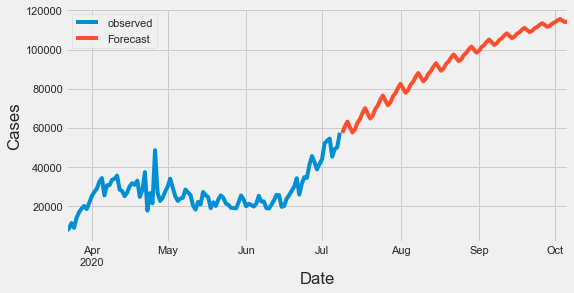

In [41]:
# forecase next three months
pred_uc = results.get_forecast(steps=90) # steps, 'exog' if SARIMAX
pred_mean=np.exp(pred_uc.predicted_mean) # predicted mean_value


ax = US.plot(label='observed', figsize=(8, 4)) #value
pred_mean.plot(ax=ax, label='Forecast')

ax.set_xlabel('Date')
ax.set_ylabel('Cases')
plt.legend()
plt.show()

In [42]:
pred_mean

2020-07-09     57359.789481
2020-07-10     60640.475725
2020-07-11     63122.699505
2020-07-12     60276.486821
2020-07-13     57583.065921
                  ...      
2020-10-02    114929.400404
2020-10-03    115638.521759
2020-10-04    114823.358321
2020-10-05    114021.367305
2020-10-06    114494.488418
Freq: D, Length: 90, dtype: float64

# GARCH

In [43]:
results.resid

Date
2020-03-22    8.871084
2020-03-23    0.171902
2020-03-24    0.348063
2020-03-25   -0.094652
2020-03-26    0.420750
                ...   
2020-07-04   -0.026865
2020-07-05   -0.188657
2020-07-06    0.097355
2020-07-07    0.025577
2020-07-08    0.109578
Length: 109, dtype: float64

In [44]:
from arch import arch_model
basic_gm=arch_model(results.resid,p=1,q=1,mean='zero',vol='ARCH',dist='normal')

In [45]:
#expanding forecast
forecasts={}
for i in range(89): ## 
    gm_result=basic_gm.fit(first_obs=0,
                           last_obs=i+20,disp='off')  ##
    temp_result=gm_result.forecast(horizon=1).variance
    fcast=temp_result.iloc[i+20] ##
    forecasts[fcast.name]=fcast
    forecast_var=pd.DataFrame(forecasts).T

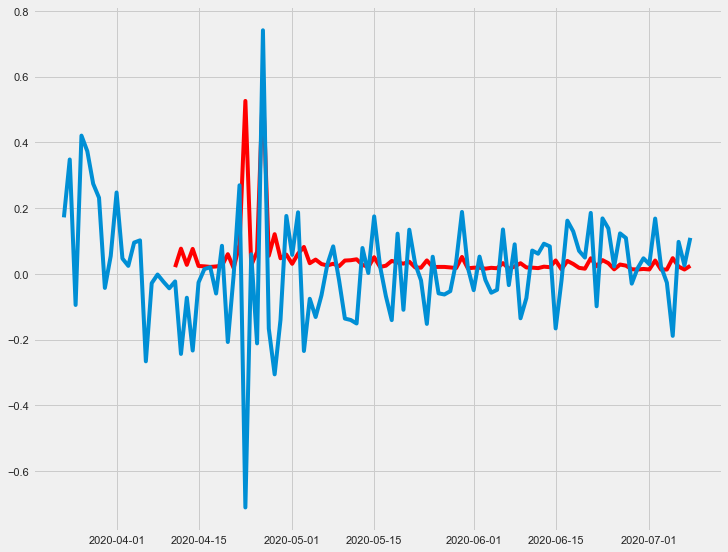

In [46]:
plt.plot(forecast_var,color='red')
plt.plot(results.resid[1:])
plt.show()

In [47]:
gm_result2=basic_gm.fit(disp='off')

In [48]:
print(gm_result.summary())

                        Zero Mean - ARCH Model Results                        
Dep. Variable:                   None   R-squared:                       0.000
Mean Model:                 Zero Mean   Adj. R-squared:                  0.009
Vol Model:                       ARCH   Log-Likelihood:                33.8604
Distribution:                  Normal   AIC:                          -63.7208
Method:            Maximum Likelihood   BIC:                          -58.3566
                                        No. Observations:                  108
Date:                Sun, Jul 12 2020   Df Residuals:                      106
Time:                        22:46:03   Df Model:                            2
                              Volatility Model                              
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
omega          0.0125  2.692e-03      4.630  3.663e-06 [7.

In [49]:
from statsmodels.stats.diagnostic import acorr_ljungbox
acorr_ljungbox(forecast_var)[1]

array([3.93627294e-01, 4.56478683e-01, 7.21572530e-06, 1.80412095e-05,
       4.66874297e-05, 1.04960586e-04, 2.29990339e-04, 4.87405901e-04,
       9.07354109e-04, 1.70810410e-03, 3.06705868e-03, 5.17712567e-03,
       8.38747854e-03, 1.26398379e-02, 1.91885061e-02, 2.82359735e-02,
       4.03733636e-02, 5.60565312e-02, 7.39401220e-02, 9.74334138e-02,
       1.25159913e-01, 1.56053660e-01, 1.93047742e-01, 2.33882486e-01,
       2.78762716e-01, 3.26538880e-01, 3.75650150e-01, 4.27124280e-01,
       4.74580630e-01, 5.20372703e-01, 5.71252269e-01, 6.14866453e-01,
       6.55856747e-01, 7.00965011e-01, 7.34169065e-01, 7.64541885e-01,
       8.00175838e-01, 8.22775064e-01, 8.44476649e-01, 8.63988452e-01])

In [50]:
temp_result=gm_result.forecast(horizon=60).variance

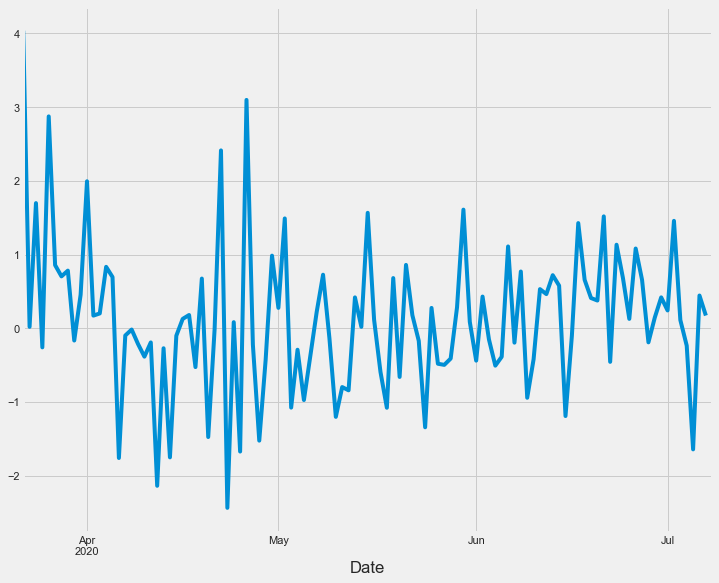

In [51]:
gm_result.std_resid.plot()

# SARIMAX

In [52]:
Asia=np.sqrt(df_new['Asia'])
Asia.head(30)

Date
2019-12-31     5.196152
2020-01-01     0.000000
2020-01-02     0.000000
2020-01-03     4.123106
2020-01-04     0.000000
2020-01-05     3.872983
2020-01-06     0.000000
2020-01-07     0.000000
2020-01-08     0.000000
2020-01-09     0.000000
2020-01-10     0.000000
2020-01-11     0.000000
2020-01-12     0.000000
2020-01-13     1.000000
2020-01-14     0.000000
2020-01-15     1.000000
2020-01-16     0.000000
2020-01-17     2.236068
2020-01-18     4.123106
2020-01-19    11.661904
2020-01-20     4.472136
2020-01-21    12.328828
2020-01-22    11.916375
2020-01-23     9.848858
2020-01-24    16.309506
2020-01-25    21.166010
2020-01-26    25.865034
2020-01-27    28.178006
2020-01-28    42.011903
2020-01-29    38.405729
Name: Asia, dtype: float64

In [53]:
# SARIMAX Asia
mod_sarimax = SARIMAX(endog=np.log(US),order=(0, 1, 1),seasonal_order=(1, 0, 1, 7),\
                      exog=Asia.shift(32).loc['2020-03-22':])

In [54]:
# have a look at asia as exdog
# P_value of Asia is 0.92, indicates it is not a good predictor of US
result_sarimax=mod_sarimax.fit()
print(result_sarimax.summary())

                                     SARIMAX Results                                     
Dep. Variable:                     United States   No. Observations:                  109
Model:             SARIMAX(0, 1, 1)x(1, 0, 1, 7)   Log Likelihood                  40.611
Date:                           Sun, 12 Jul 2020   AIC                            -71.222
Time:                                   22:46:05   BIC                            -57.812
Sample:                               03-22-2020   HQIC                           -65.785
                                    - 07-08-2020                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Asia          -0.0003      0.003     -0.100      0.920      -0.007       0.006
ma.L1         -0.4465      0.085     -5.251

# VAR 

In [55]:
# look at correlations with the US
corrs=[]
for i in range(df_new.shape[1]):
    corr=df_new['United States'].corr(df_new.iloc[:,i])
    corrs.append(corr)

In [56]:
corr_table=pd.DataFrame({'correlation':corrs,'country':df_new.columns}).sort_values('correlation',ascending=False)
corr_table.head(20)

,correlation,country
210,1.000000,United States
150,0.995292,North America
91,0.941073,High income
221,0.922054,World excl. China and South Korea
220,0.921975,World excl. China
219,0.921247,World
222,0.920860,"World excl. China, South Korea, Japan and Sing..."
166,0.900538,Romania
3,0.880102,Algeria
176,0.810668,Serbia


In [57]:
df_Var=df_new.copy()
df_Var['North_America']=df_Var['North America']-df_Var['United States']
df_Var['High_income']=df_Var['High income']-df_Var['United States']
df_Var['World_new']=df_Var['World']-df_Var['United States']
df_Var=df_Var[['North_America','High_income','World_new','Romania','Algeria','Asia','Iran','United States']]

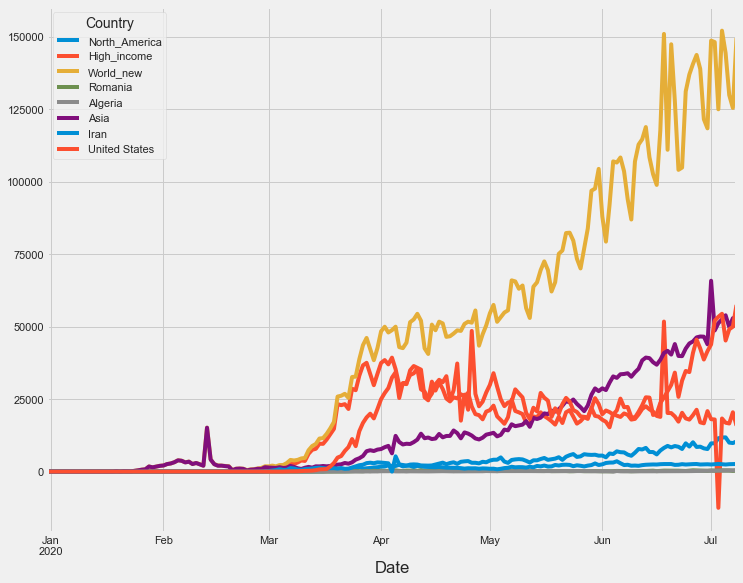

In [58]:
df_Var.plot()

In [59]:
df_Var.Asia=df_Var.Asia.shift(45)
df_Var.High_income=df_Var.High_income.shift(10)
df_Var.World_new=df_Var.World_new.shift(45)
df_Var.Iran=df_Var.Iran.shift(10)
df_Var=df_Var.dropna()

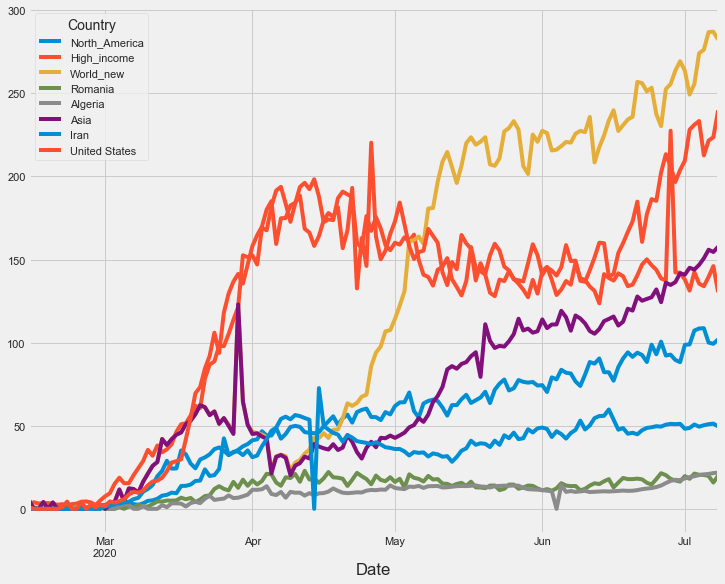

In [60]:
np.sqrt(df_Var).plot()

In [61]:
###training test
Var=np.sqrt(df_Var.loc['2020-03-15':])
nobs = 30
df_train, df_test = Var[0:-nobs], Var[-nobs:]

In [62]:
df_diff=df_train.diff(1).dropna()

In [63]:
# import for Granger's Causality Test
from statsmodels.tsa.stattools import grangercausalitytests
maxlag=20
test = 'ssr_chi2test'
def grangers_causation_matrix(data, variables, test='ssr_chi2test', verbose=False):    
    """Check Granger Causality of all possible combinations of the Time series.
    The rows are the response variable, columns are predictors. The values in the table 
    are the P-Values. P-Values lesser than the significance level (0.05), implies 
    the Null Hypothesis that the coefficients of the corresponding past values is 
    zero, that is, the X does not cause Y can be rejected.

    data      : pandas dataframe containing the time series variables
    variables : list containing names of the time series variables.
    """
    df = pd.DataFrame(np.zeros((len(variables), len(variables))), columns=variables, index=variables)
    for c in df.columns:
        for r in df.index:
            test_result = grangercausalitytests(data[[r, c]], maxlag=maxlag, verbose=False)
            p_values = [round(test_result[i+1][0][test][1],4) for i in range(maxlag)]
            if verbose: print(f'Y = {r}, X = {c}, P Values = {p_values}')
            min_p_value = np.min(p_values)
            df.loc[r, c] = min_p_value
    df.columns = [var + '_x' for var in variables]
    df.index = [var + '_y' for var in variables]
    return df
#result
grangers_causation_matrix(df_diff, variables = df_diff.columns)   ##df

,North_America_x,High_income_x,World_new_x,Romania_x,Algeria_x,Asia_x,Iran_x,United States_x
North_America_y,1.0000,0.0000,0.0002,0.0887,0.0000,0.0001,0.0005,0.0000
High_income_y,0.0000,1.0000,0.0000,0.0000,0.0394,0.0000,0.0000,0.0000
World_new_y,0.0000,0.0000,1.0000,0.0002,0.0019,0.0000,0.0065,0.0005
Romania_y,0.0000,0.0000,0.0000,1.0000,0.0000,0.0001,0.0000,0.0000
Algeria_y,0.0000,0.0007,0.0000,0.1936,1.0000,0.0000,0.1620,0.4974
Asia_y,0.0000,0.0000,0.0000,0.0000,0.0340,1.0000,0.0089,0.0000
Iran_y,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000,0.1071
United States_y,0.0024,0.0000,0.0005,0.0000,0.0000,0.0039,0.0000,1.0000


In [64]:
df_diff2=df_diff[['United States','North_America','High_income','World_new','Iran','Romania']]

In [65]:
from statsmodels.tsa.vector_ar.vecm import coint_johansen

def cointegration_test(df, alpha=0.05): 
    """Perform Johanson's Cointegration Test and Report Summary"""
    out = coint_johansen(df,-1,5)
    d = {'0.90':0, '0.95':1, '0.99':2}
    traces = out.lr1
    cvts = out.cvt[:, d[str(1-alpha)]]
    def adjust(val, length= 6): return str(val).ljust(length)

    # Summary
    print('Name   ::  Test Stat > C(95%)    =>   Signif  \n', '--'*20)
    for col, trace, cvt in zip(df.columns, traces, cvts):
        print(adjust(col), ':: ', adjust(round(trace,2), 9), ">", adjust(cvt, 8), ' =>  ' , trace > cvt)
# result 
cointegration_test(df_diff2) ###df

Name   ::  Test Stat > C(95%)    =>   Signif  
 ----------------------------------------
United States ::  183.56    > 83.9383   =>   True
North_America ::  107.28    > 60.0627   =>   True
High_income ::  52.23     > 40.1749   =>   True
World_new ::  19.86     > 24.2761   =>   False
Iran   ::  9.1       > 12.3212   =>   False
Romania ::  3.44      > 4.1296    =>   False


In [66]:
df_diff3=df_diff2[['United States','North_America','High_income','Romania','World_new']]

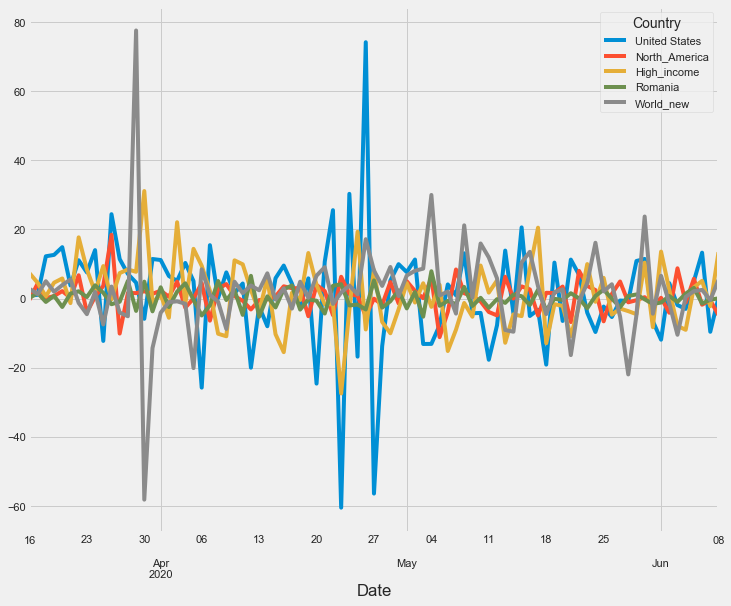

In [67]:
df_diff3.plot()

In [68]:
# choose order P for AR 
from statsmodels.tsa.api import VAR

model = VAR(df_diff3)
x= range(1,30)
for i in x:
    result = model.fit(i)
    print('Lag Order =', i)
    print('AIC : ', result.aic)
    print('BIC : ', result.bic)
    print('FPE : ', result.fpe)
    print('HQIC: ', result.hqic, '\n')

Lag Order = 1
AIC :  19.898604546567068
BIC :  20.76675340329682
FPE :  438917949.54517215
HQIC:  20.24759307944759 

Lag Order = 2
AIC :  19.93699837498457
BIC :  21.53984456087388
FPE :  459128408.70859206
HQIC:  20.58093221995845 

Lag Order = 3
AIC :  19.31070047912111
BIC :  21.658719256939897
FPE :  249768400.9226151
HQIC:  20.253394094225865 

Lag Order = 4
AIC :  19.418452722061403
BIC :  22.522368292933084
FPE :  288152780.3533752
HQIC:  20.663784322489597 

Lag Order = 5
AIC :  19.262518875887743
BIC :  23.1333121572328
FPE :  262246147.1525377
HQIC:  20.81443066379195 

Lag Order = 6
AIC :  19.09563944535672
BIC :  23.7445561179186
FPE :  245298301.95078212
HQIC:  20.95813769837192 

Lag Order = 7
AIC :  19.046142224360793
BIC :  24.48470105518293
FPE :  272568838.7775463
HQIC:  21.223297221512993 

Lag Order = 8
AIC :  18.801540517783046
BIC :  25.04154196557532
FPE :  269665705.79233783
HQIC:  21.29748627865788 

Lag Order = 9
AIC :  18.69528084681954
BIC :  25.74881595558

ValueError: array must not contain infs or NaNs

In [69]:
# fit model
model_fitted = model.fit(13)
model_fitted.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Sun, 12, Jul, 2020
Time:                     22:47:39
--------------------------------------------------------------------
No. of Equations:         5.00000    BIC:                    24.2114
Nobs:                     72.0000    HQIC:                   17.9308
Log likelihood:          -676.778    FPE:                6.46749e+08
AIC:                      13.7767    Det(Omega_mle):     2.50036e+07
--------------------------------------------------------------------
Results for equation United States
                       coefficient       std. error           t-stat            prob
------------------------------------------------------------------------------------
const                     5.626831        13.579717            0.414           0.679
L1.United States         -0.877870         0.379984           -2.310           0.021
L1.North_America          0.657704  

In [70]:
# Serial Correlation of Residuals (1.5-2.5) close to 2, better
# It seems not a good model
# still try to have a look
from statsmodels.stats.stattools import durbin_watson
out = durbin_watson(model_fitted.resid)

for col, val in zip(df_diff3.columns, out): # df_diff
    print((col), ':', round(val, 2))

United States : 2.67
North_America : 2.37
High_income : 1.48
Romania : 0.75
World_new : 1.33


In [71]:
lag_order = model_fitted.k_ar
print(lag_order)  #> 4

13


In [72]:
# Input data for forecasting
forecast_input = df_diff3.values[-lag_order:] #df
forecast_input

array([[ -0.55880907,   4.93894572,  -2.88467832,  -2.51147355,
         -5.15121006],
       [ -0.68893032,  -1.07867653,  -3.62823285,   0.76218661,
        -21.9382503 ],
       [ 10.88108328,  -0.47262395,  -4.51378859,   1.19043627,
         -4.74647696],
       [ 11.47021457,   0.40715671,  10.41104708,  -0.21539389,
         23.74219639],
       [ -6.54245513,  -2.15239077,  -8.28116601,  -1.53206923,
         -4.36277947],
       [-11.89620407,   0.22879186,  13.58705674,  -1.152677  ,
          6.59413303],
       [  4.47284847,  -4.09704585,   2.53584051,   0.73881336,
         -1.34059247],
       [ -1.87840954,   8.76786399,  -7.89618569,  -0.96562997,
        -10.47507655],
       [ -2.97865686,  -1.165519  ,  -9.03634316,   1.42011589,
          0.48179167],
       [  5.04288487,   5.73698734,   3.26556568,   3.09842061,
          2.13886496],
       [ 13.2797591 ,  -1.77596191,   5.13022919,  -1.42724862,
          2.51029812],
       [ -9.60196282,  -0.45925244,  -2.202

In [73]:
# Forecast
fc = model_fitted.forecast(y=forecast_input, steps=nobs)
df_forecast = pd.DataFrame(fc, index=df_Var.index[-nobs:],columns=df_diff3.columns) #df
df_forecast.head()

Country,United States,North_America,High_income,Romania,World_new
Date,,,,,
2020-06-09,29.962872,14.903969,0.911699,-4.217799,58.692222
2020-06-10,-7.762377,-10.585023,1.764095,7.553253,-52.560667
2020-06-11,-29.468432,14.472791,-28.749453,1.324822,-0.412185
2020-06-12,26.380446,-10.305889,24.872272,-2.264024,1.944833
2020-06-13,7.503219,15.950162,16.368298,-5.110552,6.217506


In [74]:
df_forecast['United States']=(df_forecast['United States'].cumsum()+149.338542)**2
df_forecast.head()

Country,United States,North_America,High_income,Romania,World_new
Date,,,,,
2020-06-09,32148.997206,14.903969,0.911699,-4.217799,58.692222
2020-06-10,29425.641501,-10.585023,1.764095,7.553253,-52.560667
2020-06-11,20184.057135,14.472791,-28.749453,1.324822,-0.412185
2020-06-12,28375.757076,-10.305889,24.872272,-2.264024,1.944833
2020-06-13,30959.905696,15.950162,16.368298,-5.110552,6.217506


In [75]:
# Evaluation
# not good 
from statsmodels.tsa.stattools import acf
def forecast_accuracy(forecast, actual):
    mape = np.mean(np.abs(forecast - actual)/np.abs(actual))  # MAPE
    me = np.mean(forecast - actual)             # ME
    mae = np.mean(np.abs(forecast - actual))    # MAE
    mpe = np.mean((forecast - actual)/actual)   # MPE
    rmse = np.mean((forecast - actual)**2)**.5  # RMSE
    corr = np.corrcoef(forecast, actual)[0,1]   # corr
    mins = np.amin(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    maxs = np.amax(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    minmax = 1 - np.mean(mins/maxs)             # minmax
    return({'mape':mape, 'me':me, 'mae': mae, 
            'mpe': mpe, 'rmse':rmse, 'corr':corr, 'minmax':minmax})

print('Forecast Accuracy of: United States') # 
accuracy_prod = forecast_accuracy(df_forecast['United States'].values, df_test['United States']**2) #f #test
for k, v in accuracy_prod.items():
    print((k), ': ', round(v,4))


Forecast Accuracy of: BCST
mape :  0.3171
me :  -1837.6551
mae :  10817.8686
mpe :  0.0271
rmse :  13963.8287
corr :  0.3605
minmax :  0.2636


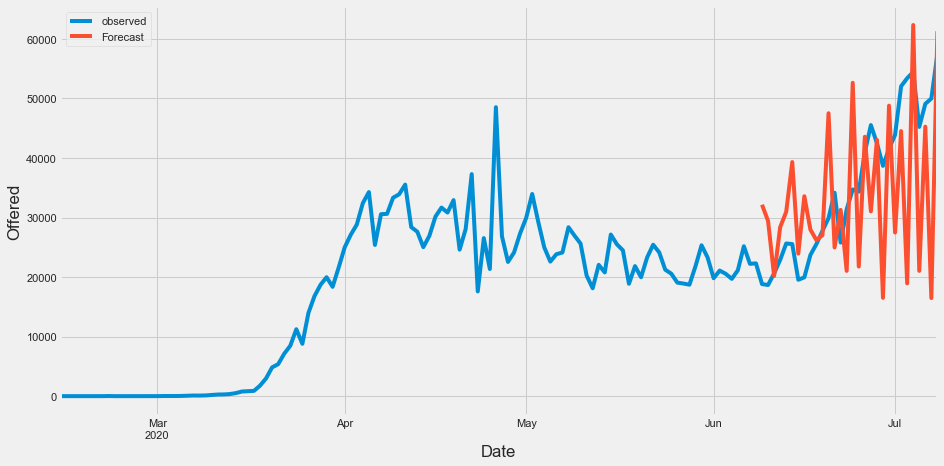

In [76]:
# visualize forecast 
# Not good
ax = df_Var['United States'].plot(label='observed', figsize=(14, 7))
df_forecast['United States'].plot(ax=ax, label='Forecast')
ax.set_xlabel('Date')
ax.set_ylabel('Offered')
plt.legend()
plt.show()

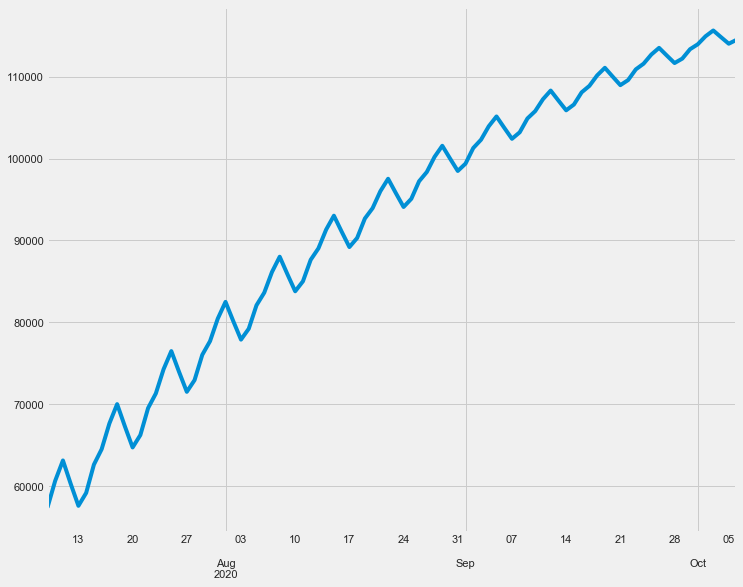

In [77]:
# Result: the SARIMA Model is the best one
# plot the next three month since 07/09
pred_mean.plot()